In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm
import seaborn as sns
%matplotlib inline


1. EDA

In [ ]:
df = pd.read_csv('Customer_Churn.csv')

In [ ]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df.tail()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
19995,zero,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,STAY
19996,one,107126,71,82,237397,609,5,2,very_sat,very_little,no,STAY
19997,zero,78529,0,66,172589,275,0,2,unsat,very_high,considering,LEAVE
19998,zero,78674,47,41,572406,288,4,2,very_unsat,little,considering,LEAVE
19999,zero,124697,0,0,845575,808,24,14,unsat,high,actively_looking_into_it,LEAVE


In [ ]:
df.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [ ]:
print(df.columns.values)


['COLLEGE' 'INCOME' 'OVERAGE' 'LEFTOVER' 'HOUSE' 'HANDSET_PRICE'
 'OVER_15MINS_CALLS_PER_MONTH' 'AVERAGE_CALL_DURATION'
 'REPORTED_SATISFACTION' 'REPORTED_USAGE_LEVEL'
 'CONSIDERING_CHANGE_OF_PLAN' 'LEAVE']


In [ ]:
print("*****In the data set*****")
print(df.isna().sum())


*****In the data set*****
COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
LEAVE                          0
dtype: int64


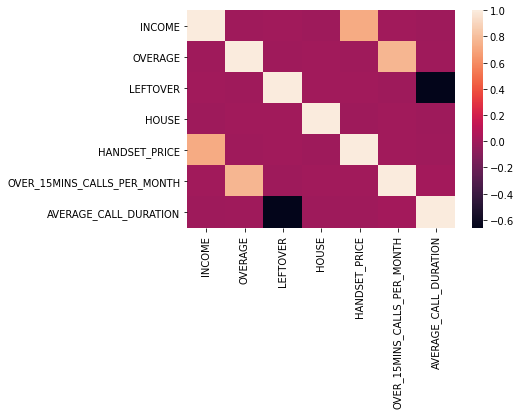

In [ ]:
sns.heatmap(df.corr());


We can see the HANDSET_PRICE and income is very correlated ad well as OVER_15MINS_CALLS_PER_MONTH and OVERAGE

In [ ]:
# df = df.drop(['HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH'],axis =1)

In [ ]:
g = sns.FacetGrid(df, col='LEAVE')
g.map(plt.hist, 'CONSIDERING_CHANGE_OF_PLAN', bins=20)
g.set_xticklabels(rotation=90)

NameError: ignored

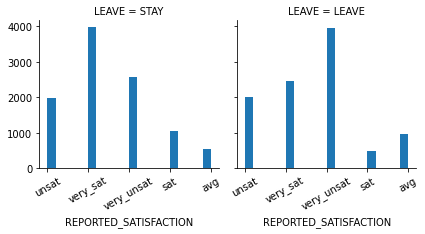

In [ ]:
g = sns.FacetGrid(df, col='LEAVE')
g.map(plt.hist, 'REPORTED_SATISFACTION', bins=20)
g.set_xticklabels(rotation=30)

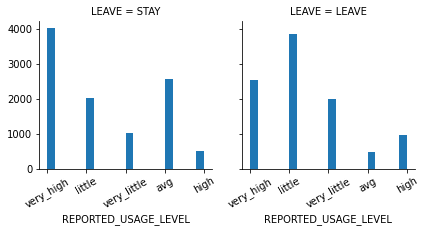

In [ ]:
g = sns.FacetGrid(df, col='LEAVE')
g.map(plt.hist, 'REPORTED_USAGE_LEVEL', bins=20)
g.set_xticklabels(rotation=30)

In [ ]:
numeric_data = df.iloc[:,1:6]
numeric_data_scaled = MinMaxScaler().fit_transform(numeric_data)

In [ ]:
K_MAX = 20
KK = range(1,K_MAX+1)

KM = [kmeans(numeric_data_scaled,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(numeric_data_scaled, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]
totss = sum(pdist(numeric_data_scaled)**2)/numeric_data_scaled.shape[0]
betweenss = totss - tot_withinss


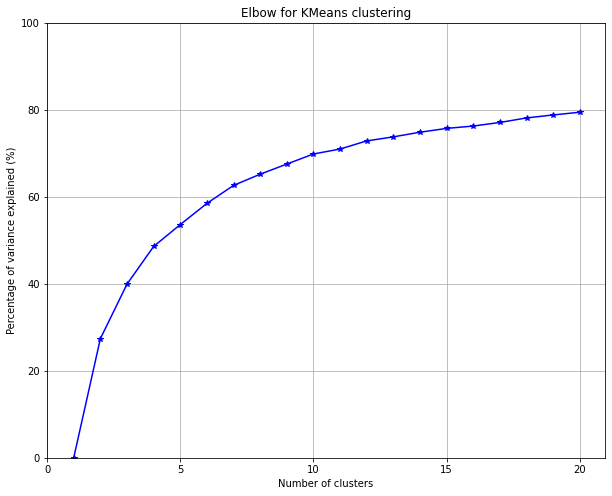

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.set_ylim((0,100))
plt.xticks(range(0,25,5))
plt.grid(True)
plt.xlabel('Number of clusters');
plt.ylabel('Percentage of variance explained (%)');
plt.title('Elbow for KMeans clustering');

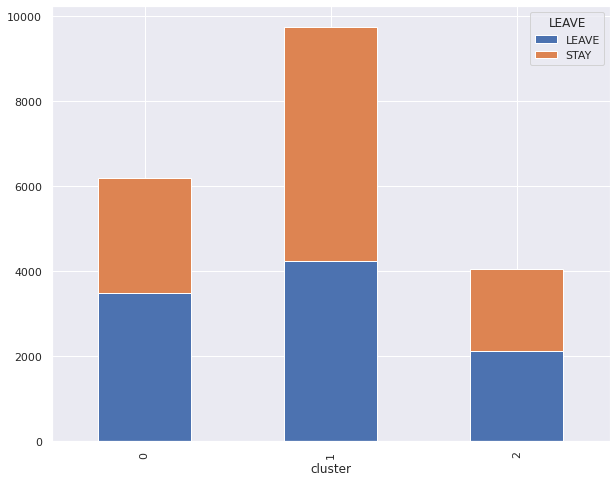

In [ ]:
kmeans = KMeans(n_clusters=3)
numeric_data['cluster']  = pd.Series(kmeans.fit_predict(numeric_data_scaled))
numeric_data  = pd.concat([numeric_data,df[['LEAVE']]],axis = 1)
count_df = numeric_data.groupby(['cluster','LEAVE']).count()[['INCOME']].reset_index()
plotdf = pd.pivot_table(count_df,values = 'INCOME',columns='cluster',index = 'LEAVE')
sns.set()
plotdf.T.plot(kind='bar', stacked=True,figsize=(10,8))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


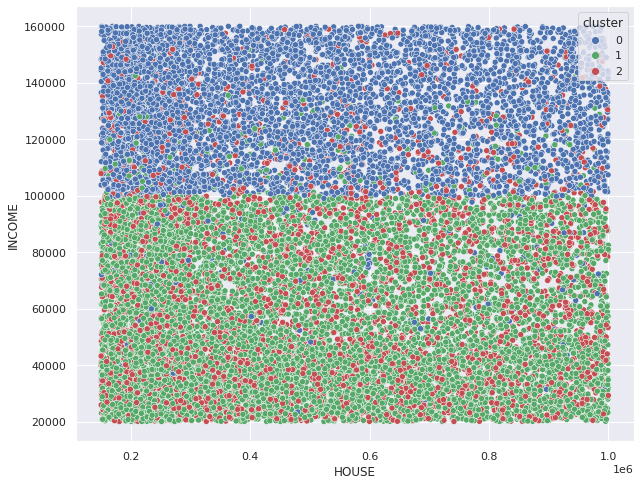

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(numeric_data['HOUSE'],numeric_data['INCOME'],hue=numeric_data['cluster'],ax=ax,palette=["b", "g", "r"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


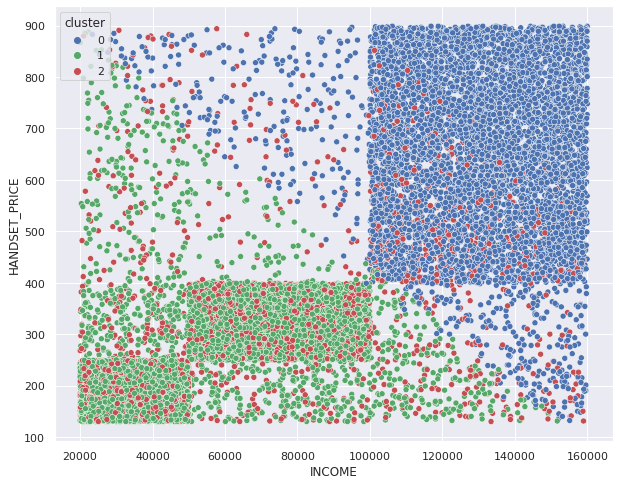

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(numeric_data['INCOME'],df['HANDSET_PRICE'],hue=numeric_data['cluster'],ax=ax,palette=["b", "g", "r"])

2. Is the data balanced?ANSWER: Balance. If dataset is impabalce the training process will bias on label with higher number. because the loss value of bigger class contribute more on the total loss

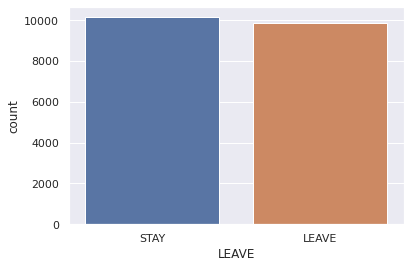

In [ ]:
sns.countplot(x='LEAVE', data=df);


In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['REPORTED_SATISFACTION'])
df['REPORTED_SATISFACTION'] = labelEncoder.transform(df['REPORTED_SATISFACTION'])

labelEncoder.fit(df['CONSIDERING_CHANGE_OF_PLAN'])
df['CONSIDERING_CHANGE_OF_PLAN'] = labelEncoder.transform(df['CONSIDERING_CHANGE_OF_PLAN'])

labelEncoder.fit(df['REPORTED_USAGE_LEVEL'])
df['REPORTED_USAGE_LEVEL'] = labelEncoder.transform(df['REPORTED_USAGE_LEVEL'])

labelEncoder.fit(df['COLLEGE'])
df['COLLEGE'] = labelEncoder.transform(df['COLLEGE'])

labelEncoder.fit(df['LEAVE'])
df['LEAVE'] = labelEncoder.transform(df['LEAVE'])



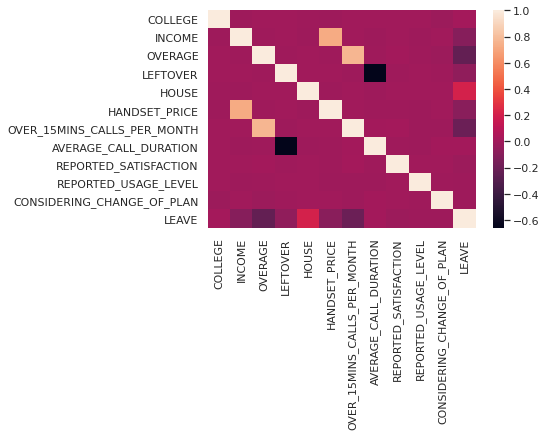

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = np.array(df.drop(['LEAVE'], 1).astype(float))
y = np.array(df['LEAVE'])


In [ ]:
#yy = [1 if y[i]=='LEAVE' else 0 for i in y   ]

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    #print(prediction[0])
    if prediction[0] == y[i]:
        correct += 1

In [ ]:
print(correct/len(X))


0.39675


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
correct = 0
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    #print(prediction[0])
    if prediction[0] == y_train[i]:
        correct += 1

In [ ]:
print('train accuracy:',correct/len(X_train))

train accuracy: 0.3957857142857143


In [ ]:
correct = 0
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    #print(prediction[0])
    if prediction[0] == y_test[i]:
        correct += 1

In [ ]:
print('test accuracy:',correct/len(X_test))

test accuracy: 0.3985


In [ ]:
# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)

<generator object _BaseKFold.split at 0x7fe5a718df10>

In [ ]:
accuracy_model = []

# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X_train)
    #model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, kmeans.predict(X_test), normalize=True)*100)

# Print the accuracy
print(accuracy_model)


[60.25, 39.2, 41.075, 60.62499999999999, 60.95]
